## Introduction

### Ensemble Methods

- construct set of classifiers
  - then classify new data points by taking weighted vote of their predictions
- combine decisions from multiple models to improve performance

### 2 Methods:
  - Random Forests
  - Gradient Boosted Trees

## Gradient Boosting

- Gradient Descent + Boosting

### Boosting:
  - weak learners added sequentially
  - train weak learners on errors of previous weak model

  - Additive modeling of the weak learners

  $ F(x) = \sum_{t=1}^{M} \alpha_t h_t(x) $

In [258]:
import sklearn
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [278]:
# generating random data
dataset = make_moons(n_samples=10000,
                     shuffle=True,
                     #   n_classes=3,
                     random_state=82,
                     noise=0.3
                     )
print(type(dataset))

<class 'tuple'>


In [279]:
dataset[0].shape, dataset[1][:5], type(dataset[1]), set(dataset[1])

((10000, 2), array([1, 1, 0, 0, 0]), numpy.ndarray, {0, 1})

In [280]:
X, y = dataset
X.shape, y.shape

((10000, 2), (10000,))

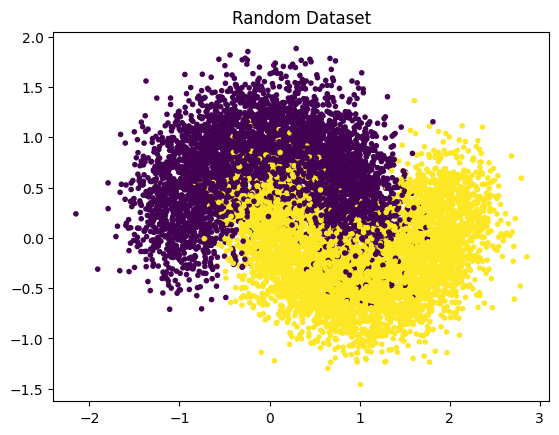

In [281]:
plt.title("Random Dataset")
plt.scatter(X[:, 0], X[:, 1], marker='.',c=y)
plt.show()

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)
print(f'X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}')

X_train:(7000, 2), X_test:(3000, 2), y_train:(7000,), y_test:(3000,)


In [283]:
class AdaBoost:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initial weights
        weights = np.ones(n_samples)/n_samples
        # np.fillna(0)
        weights[np.isnan(weights)] = 0
        # weights = np.array([0.0000000001 if i==0  else i for i in weights])
        for i in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)

            model.fit(X, y, sample_weight=weights)
            y_pred = model.predict(X)
            # print(y_pred,y)
            error = np.sum(weights*(y_pred!=y))/np.sum(weights)
            print(f"Error for {i} model is {error:.3f}")

            # added 1e-10 so as to not get NaN values in the weights
            alpha = 0.5*np.log((1-error)/(error + 1e-10))
            self.alphas.append(alpha)
            self.models.append(model)

            weights *= np.exp(-alpha*y*y_pred)
            weights /= np.sum(weights)

        print(self.alphas)


    def predict(self, X,  y):
        n_samples, n_features = X.shape

        predictions = np.zeros(n_samples)
        for alpha, model in zip(self.alphas, self.models):
            print(f'Accuracy for single model: {accuracy_score(model.predict(X), y)}')
            predictions += alpha*model.predict(X)

        return np.sign(predictions)

In [284]:
model = AdaBoost()
model

In [285]:
model.fit(X_train, y_train)

Error for 0 model is 0.196
Error for 1 model is 0.219
Error for 2 model is 0.187
Error for 3 model is 0.252
Error for 4 model is 0.252
Error for 5 model is 0.252
Error for 6 model is 0.252
Error for 7 model is 0.252
Error for 8 model is 0.252
Error for 9 model is 0.252
[0.7057423047191226, 0.6367577620190208, 0.7341725283661305, 0.542923918364508, 0.542923918364508, 0.542923918364508, 0.542923918364508, 0.542923918364508, 0.542923918364508, 0.542923918364508]


In [286]:
accuracy_score(model.predict(X_test, y_test),  y_test)

Accuracy for single model: 0.8023333333333333
Accuracy for single model: 0.7896666666666666
Accuracy for single model: 0.6666666666666666
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335
Accuracy for single model: 0.49433333333333335


0.8463333333333334

Here, we can see the individual accuracy of model are around 50 and just 3 models have 66,78 and  80% accuracy. However, with AdaBoosting, the learned weights are assigned get the final accuracy of **84%**.

## References

- https://web.engr.oregonstate.edu/~tgd/publications/mcs-ensembles.pdf
- https://scikit-learn.org/stable/modules/ensemble.html
- https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/adaboost.py
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons